### Importação de bibliotecas

In [106]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Carregamento e Pré-Processamento dos Dados

In [107]:
# Carregar o dataset
df = pd.read_csv('accounts.csv')

### Exercício 1

### Exercício 1 a) 

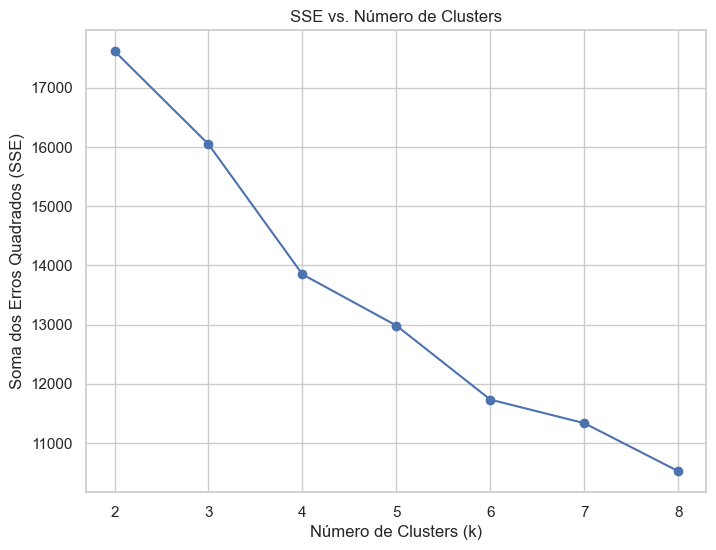

In [108]:
# Selecionar as primeiras 8 colunas e remover duplicados e valores nulos
df_clean = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']].drop_duplicates().dropna()

# Converter dados categóricos para numéricos com get_dummies e drop_first=True
df_clean = pd.get_dummies(df_clean, columns=['job', 'marital', 'education', 'default', 'housing', 'loan'], drop_first=True)

# Normalização dos dados com MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clean)

# Aplicar k-means clustering com diferentes valores de k e calcular SSE (inertia)
sse = []
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Representar graficamente SSE em função do número de clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.title('SSE vs. Número de Clusters')
plt.grid(True)
plt.show()


### Exercício 1 b)

Para determinar o número ideal de clusters, utilizámos o método do "cotovelo", analisando a relação entre a inércia e o número de clusters.

  Observámos que, ao aumentar o número de clusters, a inércia diminui, indicando uma melhor adaptação dos grupos aos dados. No entanto, essa redução torna-se progressivamente menos significativa, pelo que o aumento de clusters traz ganhos cada vez menores.

  No gráfico, o ponto de "cotovelo" ocorre em k=4, onde a queda na inércia se torna menos acentuada. Este ponto representa um equilíbrio adequado entre uma boa segmentação dos dados e a simplicidade do modelo, sugerindo que 4 clusters oferecem uma divisão eficiente sem adicionar complexidade desnecessária.


### Exercício 1 c) 

Sim, o algoritmo k-modes seria mais adequado para este conjunto de dados, visto que este contém várias variáveis categóricas, como "emprego", "estado civil" e "escolaridade". 

  Isto acontece porque, ao contrário do k-means, que se baseia na distância euclidiana e é mais indicado para variáveis numéricas contínuas, o k-modes utiliza a distância de correspondência para calcular similaridades, o que permite uma análise mais precisa de dados categóricos.

  Note-se também que o k-modes é uma adaptação do k-means, desenvolvida concretamente para lidar com dados categóricos: em vez de minimizar a distância quadrática, o k-modes minimiza o número de discrepâncias entre categorias dentro de cada cluster. Assim, os clusters formados pelo k-modes são definidos com base nas categorias mais frequentes, o que facilita a interpretação e dispensa a transformação das variáveis categóricas em dummies. 

  Resumindo, o k-modes gera clusters mais representativos e proporciona interpretações mais intuitivas para dados puramente categóricos.


### Exercício 2 a)

In [109]:
# Selecionar as primeiras 8 características e remover duplicados e valores nulos
data = df.iloc[:, :8]
data = data.drop_duplicates().dropna()

# Converter características categóricas em numéricas
data_encoded = pd.get_dummies(data, drop_first=True)

# Normalização dos dados com StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Calcular e exibir a variância explicada pelos dois primeiros componentes
explained_variance = pca.explained_variance_ratio_ * 100
print(f"Variância explicada pelo primeiro componente principal: {explained_variance[0]:.3f}%")
print(f"Variância explicada pelo segundo componente principal: {explained_variance[1]:.3f}%")
print(f"Variância total explicada pelos dois primeiros componentes: {explained_variance.sum():.3f}%")


Variância explicada pelo primeiro componente principal: 11.679%
Variância explicada pelo segundo componente principal: 11.076%
Variância total explicada pelos dois primeiros componentes: 22.755%


### Exercício 2 b)

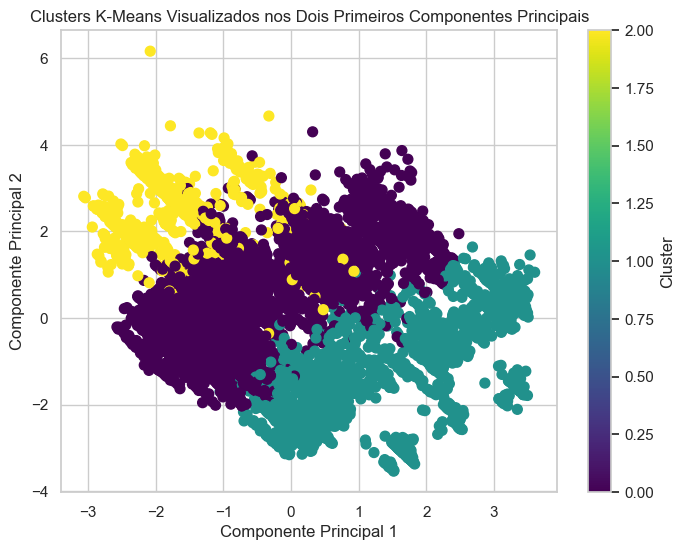

In [110]:
# Aplicar K-Means clustering com k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Gráfico de dispersão baseado nos dois primeiros componentes principais, colorido por cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters K-Means Visualizados nos Dois Primeiros Componentes Principais')
plt.colorbar(label='Cluster')
plt.show()


O gráfico de dispersão do clustering com k-means para k = 3, projetado nos dois primeiros componentes principais, mostra alguma separação, especialmente entre os clusters amarelo (2) e verde (1). 

  No entanto, há uma sobreposição significativa entre os clusters roxo (0) e verde (1), e uma outra sobreposição, embora bastante menor, entre os clusters roxo (0) e amarelo (2), o que indica que estes clusters não se conseguem distinguir, respetivamente, a 100% entre si. 

  Esta sobreposição sugere, portanto, que poderiam ser necessários mais componentes principais, uma análise em dimensões superiores para separar melhor os clusters, ou ainda que a estrutura dos dados não suporta completamente três clusters distintos nestas dimensões.


### Exercício 2 c)

<Figure size 1600x800 with 0 Axes>

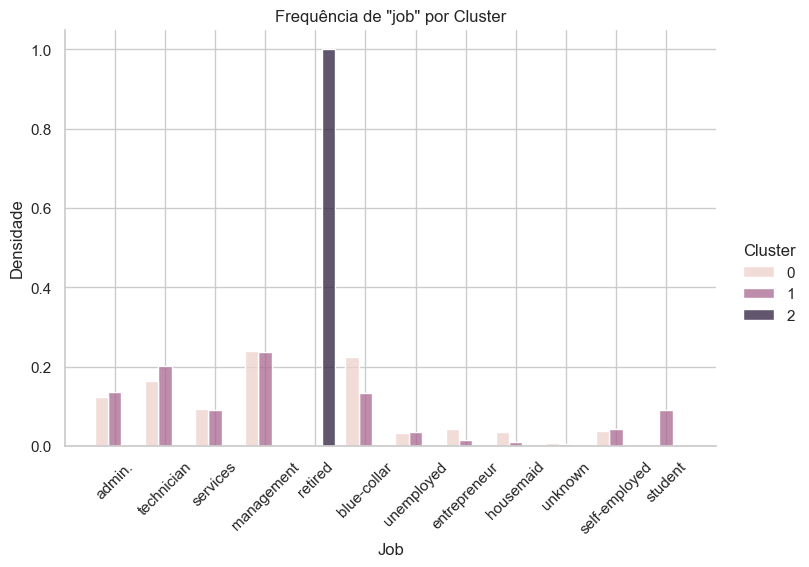

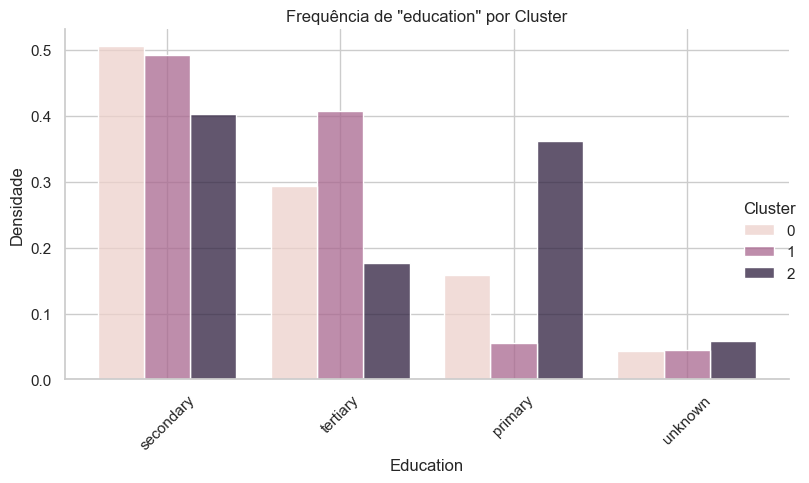

In [111]:
# Adicionar a coluna de clusters ao DataFrame original
data['Cluster'] = clusters

# Representar graficamente a frequência de "job" e "education" para cada cluster
plt.figure(figsize=(16, 8))

# Displot para a variável 'job'
sns.displot(data=data, x='job', hue='Cluster', multiple="dodge", stat='density', 
             shrink=0.8, common_norm=False, height=5, aspect=1.5)
plt.title('Frequência de "job" por Cluster')
plt.xlabel('Job')
plt.ylabel('Densidade')
plt.xticks(rotation=45)

# Displot para a variável 'education'
sns.displot(data=data, x='education', hue='Cluster', multiple="dodge", stat='density', 
             shrink=0.8, common_norm=False, height=5, aspect=1.5)
plt.title('Frequência de "education" por Cluster')
plt.xlabel('Education')
plt.ylabel('Densidade')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


A distribuição de trabalho e educação entre os clusters sugere demografias distintas: 

- O Cluster 2 é composto principalmente por indivíduos reformados (“retired”) com níveis de educação mais baixos (valores de “secondary” e “primary” mais elevados do que “tertiary”), o que indica que se trata de uma população mais velha; 

- O Cluster 1 apresenta, em comparação, uma maior proporção de pessoas com níveis de educação mais elevados (“tertiary” com valores muito superiores) em funções profissionais, como técnicos (“technician”) e trabalhadores administrativos (“admin.”), de serviços (“services”) e de gestão (“management”), pelo que provavelmente representam uma população mais jovem com um melhor nível de educação e que ainda se encontra no mercado de trabalho;

- O Cluster 0 apresenta uma maior diversidade em termos de educação (sendo os valores mais altos os de “secondary”, seguidos de “tertiary” e “primary”), e apresenta também profissões muito variadas, com destaque para as funções de gestão (“management”) e de “blue-collar”, que têm os valores mais elevados.
